# TAREA 1: Métodos de aprendizaje conjunto.

## 1. Preguntas conceptuales

### 1.1. ¿Si un algoritmo `gradient boosting ensemble` muestra `sobreajuste`, ¿debería aumentar o disminuir la tasa de aprendizaje? Argumente su respuesta.

**Respuesta:**

Se debería disminuir la tasa de aprendizaje.  El Gradient Boosting,  construye modelos secuenciales donde cada nuevo modelo corrige los errores del modelo anterior.  La tasa de aprendizaje afecta la velocidad con la que el modelo se ajusta a los datos. Si se disminuye la tasa de aprendizaje, cada nuevo  modelo afecta menos sobre la predicción final. por tanto el algoritmo hace correcciones más pequeñas en cada iteración es decir es mas gradual y controlado y disminuyendo el riesgo de sobreajuse.  

### 1.2. Si ha entrenado 5 `modelos diferentes` de clasificación con exactamente los mismos datos de entrenamiento y todos ellos alcanzan una exactitud (`accuracy`) del $95\%$, ¿existe alguna posibilidad de que pueda combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?



**Respuesta:**
Sí es posible mejorar los resultados combinando los modelos, al ser metodos diferentes, los errores pueden ser diferentes y por tanto al combinarlos se complementan y se puede reducir el error total.

### 1.3. Suponga que en el escenario de la pregunta `1.2` se combinan los `5` clasificadores base mediante el método de `voto mayoriatario duro`. Calcule el error del clasificador conjunto.

**Respuesta:**


In [5]:
# Importar librerías necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar un conjunto de datos (por ejemplo, el conjunto de datos Iris)
data = load_iris()

# Describir los datos
X = data.data
y = data.target


In [8]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los cinco modelos base
modelo1 = DecisionTreeClassifier(max_depth=3, random_state=42)  # Árbol de decisión
modelo2 = KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors
modelo3 = GaussianNB()  # Naive Bayes Gaussiano
modelo4 = LogisticRegression(max_iter=1000, random_state=42)  # Regresión logística
modelo5 = SVC(probability=True, kernel='linear', random_state=42)  # Support Vector Classifier con kernel lineal

# Crear el Voting Classifier con voting='hard' (voto mayoritario duro)
votador = VotingClassifier(estimators=[
    ('decision_tree', modelo1),
    ('svc', modelo2),
    ('knn', modelo3),
    ('naive_bayes', modelo4),
    ('logistic_regression', modelo5)
], voting='hard')

# Ajustar el Voting Classifier a los datos de entrenamiento
votador.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
predicciones_conjunto = votador.predict(X_test)

# Calcular la exactitud del clasificador conjunto
exactitud = accuracy_score(y_test, predicciones_conjunto)
print(f'Exactitud del Voting Classifier: {exactitud:.2f}')

# Calcular el error del clasificador conjunto
error = 1 - exactitud
print(f'Error del clasificador conjunto: {error:.2f}')


Exactitud del Voting Classifier: 1.00
Error del clasificador conjunto: 0.00


In [9]:
# Evalua de forma individual 
modelos_base = {
    'Decision Tree': modelo1,
    'KNN': modelo2,
    'Naive Bayes': modelo3,
    'Logistic Regression': modelo4,
    'SVM': modelo5
}


for nombre, modelo in modelos_base.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    exactitud = accuracy_score(y_test, predicciones)
    error = 1 - exactitud
    print(f'{nombre} - Exactitud: {exactitud:.2f}, Error: {error:.2f}')

Decision Tree - Exactitud: 1.00, Error: 0.00
KNN - Exactitud: 1.00, Error: 0.00
Naive Bayes - Exactitud: 0.98, Error: 0.02
Logistic Regression - Exactitud: 1.00, Error: 0.00
SVM - Exactitud: 1.00, Error: 0.00


### 1.4. ¿Si un algoritmo `Adaboost` muestra `subajuste`, ¿qué hiperparámetros debería ajustar y cómo? Argumente su respuesta.

### Respuesta
Significa que el modelo es demasiado simple para capturar la complejidad de los datos y, por lo tanto, no está obteniendo un rendimiento adecuado tanto en el conjunto de entrenamiento como en el de prueba. 
Para mejorar el rendimiento y reducir el subajuste, se pueden ajustar varios Hiperparametros:

1. Aumentar el número de estimadores. puede ayudar a reducir el subajuste, ya que permite que el modelo aprenda más características de los datos. 
2. Reducir la tasa de aprendizaje.  puede ayudar a mejorar el rendimiento al hacer que el modelo se ajuste más lentamente y de manera más precisa a los datos. 
3. Incrementar la profundidad de los árboles, permite que cada clasificador débil sea más complejo, lo cual puede ayudar a reducir el subajuste. 
4. Cambiar el clasificador débil a uno más complejo, como un árbol de decisión de mayor profundidad o incluso otros modelos más sofisticados, puede ayudar a capturar mejor las características de los datos.


## 2. Ejercicio(s) práctico(s)

El conjunto de datos `mnist_784`, contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE.UU. Es posible acceder a este dataset medinte las siguientes instrucciones:

In [6]:
%%time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

pd.DataFrame(X)

CPU times: total: 10.8 s
Wall time: 10.8 s


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La etiqueta de esta imagen es:  3


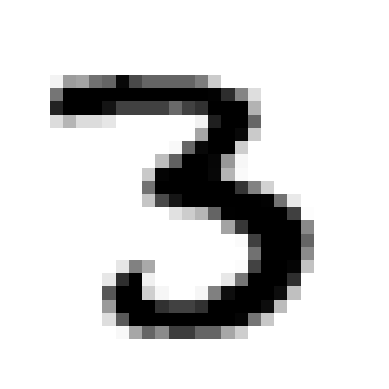

In [7]:
##Visualización
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
print("La etiqueta de esta imagen es: ", y[12])
plot_digit(X[12])

- 2.1 Escale todas las `784` variables con el método `min-max`; pero usando en máximo y el mínimo globales, en lugar de los de cada columna. Vrase el `ejercicio 0312` del capítulo 5, unidad 8 (`ensemble algorithms`).

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   778  779  780  781  782  783  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


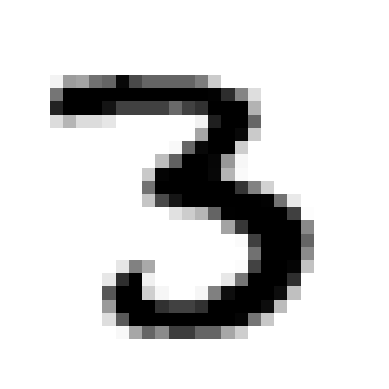

In [8]:
import pandas as pd
import warnings
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

# Carga el dataset MNIST
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Convertimos el array a un DataFrame de pandas
df = pd.DataFrame(X)

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar el dataset
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Verifica el resultado
print(df_normalized.head())

# Selecciona una fila del DataFrame normalizado (por ejemplo, la primera fila)
first_image = df_normalized.iloc[12].values

# Plotea la imagen normalizada
plot_digit(first_image)

- 2.2 Divida los datos en un conjunto de entrenamiento y un conjunto de prueba (utilizar $60.000$ registros para el entrenamiento y $10.000$ para prueba). Luego, entrene los siguientes clasificadores optimizando los `hiperparámetros` más representativos (excepto los de regularización) mediante la `validación cruzada `:

  - clasificador SVM.
  - Regresión logística
  - Naive Bayes
  - K-vecinos
  - Árbol de decisión

  Compare los rendimientos de cada uno de ellos.

In [9]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

# Carga el dataset MNIST
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Normaliza los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Divide el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=60000, test_size=10000, stratify=y, random_state=42)


In [10]:
# Definir los clasificadores y los hiperparámetros a optimizar
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True) 
}

param_grids = {
    "LogisticRegression": {
        "solver": ["lbfgs", "liblinear"],
        "C": [0.1, 1, 10], # Parametros de ajuse, de mayor (0.1) a menor regularización penaliza más los coeficientes grandes, lo que tiende a reducir el ajuste 
                           # del modelo a los datos de entrenamiento y puede mejorar su capacidad de generalización a nuevos datos.
                           # (10) El modelo intentará ajustarse lo más posible a los datos de entrenamiento. 
        "n_jobs":[-1]      # Utiliza todos los núcleos disponibles
    },
    "NaiveBayes": {
        # GaussianNB no tiene hyperparaemtros excepto var_smoothing el cual es para regularización
    },
    "KNeighbors": {
        "n_neighbors": [3, 5, 7],   # número de vecinos más cercanosm, con menos vecinos puede capturar mejor la estructura local del espacio de datos, 
                                    # pero puede ser sensible al ruido y a las variaciones en los datos.
                                    # con más vecinos, Proporciona una decisión más general y robusta, pero puede suavizar demasiado y perder la estructura local específica. 
        "weights": ["uniform", "distance"], # uniform: todos los vecinos tienen el mismo peso en la votación 
                                           #  distance: Los vecinos más cercanos tienen más influencia en la decisión.
        "n_jobs":[-1]                # Utiliza todos los núcleos disponibles
    },
    "DecisionTree": {
        "criterion": ["gini", "entropy"], # "gini": Utiliza el índice de Gini para medir la impureza de un nodo.
                                          # "entropy": Utiliza la entropía para medir la impureza de un nodo.
        "splitter": ["best", "random"],   # "best": Busca la mejor división posible en cada nodo.
                                          # "random": Selecciona la mejor división entre un subconjunto aleatorio de características. 
        "max_depth": [None, 10, 20]       # None: No hay límite en la profundidad del árbol.
                                          # 10: La profundidad máxima del árbol es 10 niveles.
                                          # 20: La profundidad máxima del árbol es 20 niveles.  
    },
    "SVM": {
        "kernel": ["linear", "rbf"], # linear": Utiliza un kernel lineal.
                                     #"rbf": Utiliza un kernel de función de base radial (kernel Gaussiano).
        "C": [0.1, 1, 10],           # Controla la regularización. Valores altos de C reducen la regularización (más ajustado a los datos de entrenamiento), 
                                     # y valores bajos de C aumentan la regularización (mejor generalización).
        "gamma": ["scale", "auto"]  # scale: gamma se calcula como  1/n -varizanza(X).   Puede llevar a valores altos de gama, 
                                     # que puede hacer el modelo mas susceptible a sobreajuste
                                     # auto: se calcula como 1/n    n=Número de caracteristicas
    }
}

In [11]:
# Entrenar los clasificadores y optimizar los hiperparámetros mediante la validación cruzada
best_estimators = {}
for clf_name in classifiers:
    print(f"Entrenando {clf_name}...")
    if clf_name == "NaiveBayes":
        best_estimators[clf_name] = classifiers[clf_name]
        best_estimators[clf_name].fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(classifiers[clf_name], param_grids[clf_name], cv=3, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimators[clf_name] = grid_search.best_estimator_
        print(f"Mejores Parámetros para {clf_name}: {grid_search.best_params_}")

Entrenando LogisticRegression...
Mejores Parámetros para LogisticRegression: {'C': 0.1, 'n_jobs': -1, 'solver': 'lbfgs'}
Entrenando NaiveBayes...
Entrenando KNeighbors...
Mejores Parámetros para KNeighbors: {'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}
Entrenando DecisionTree...
Mejores Parámetros para DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Entrenando SVM...
Mejores Parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [12]:
# Evaluar el rendimiento de los clasificadores en el conjunto de prueba
results = {}
for clf_name in best_estimators:
    clf = best_estimators[clf_name]
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy
    print(f"{clf_name} accuracy: {accuracy:.4f}")

# Mostrar los resultados
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print("\nRendimiento de los clasificadores:\n")
print(results_df)

LogisticRegression accuracy: 0.9225
NaiveBayes accuracy: 0.5563
KNeighbors accuracy: 0.9751
DecisionTree accuracy: 0.8778
SVM accuracy: 0.9836

Rendimiento de los clasificadores:

                    Accuracy
LogisticRegression    0.9225
NaiveBayes            0.5563
KNeighbors            0.9751
DecisionTree          0.8778
SVM                   0.9836


- 2.3 Utilizando la combinación de hiperparámetroas más óptima para cada uno de los modelos anteriores, construya un clasificador por `voto mayoritario` tanto tipo `hard` como tipo `soft`. Elija el más `eficiente` de los dos métodos y compare su rendimientro contra el mejor clasificador undividual del numeral anterior.

In [13]:
from sklearn.ensemble import VotingClassifier

# Construir un clasificador por voto mayoritario
voting_clf_hard = VotingClassifier(
    estimators=[(clf_name, best_estimators[clf_name]) for clf_name in best_estimators],
    voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[(clf_name, best_estimators[clf_name]) for clf_name in best_estimators],
    voting='soft'
)

# Entrenar los clasificadores por voto mayoritario
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# Evaluar el rendimiento de los clasificadores por voto mayoritario
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(f"Voting Classifier (Hard) accuracy: {accuracy_hard:.4f}")
print(f"Voting Classifier (Soft) accuracy: {accuracy_soft:.4f}")

# Comparar el rendimiento de los clasificadores por voto mayoritario con el mejor clasificador individual
best_individual_clf = max(results, key=results.get)
best_individual_accuracy = results[best_individual_clf]

print(f"\nMejor clasificador individual: {best_individual_clf} con una precisión de {best_individual_accuracy:.4f}")

if accuracy_soft > accuracy_hard:
    best_voting_accuracy = accuracy_soft
    best_voting_method = "Soft"
else:
    best_voting_accuracy = accuracy_hard
    best_voting_method = "Hard"

print(f"\nMejor clasificador por voto mayoritario: {best_voting_method} Voting con una precisión de {best_voting_accuracy:.4f}")

if best_voting_accuracy > best_individual_accuracy:
    print(f"\nEl clasificador por voto mayoritario ({best_voting_method} Voting) es mejor que el mejor clasificador individual.")
else:
    print(f"\nEl mejor clasificador individual ({best_individual_clf}) es mejor que el clasificador por voto mayoritario ({best_voting_method} Voting).")

Voting Classifier (Hard) accuracy: 0.9695
Voting Classifier (Soft) accuracy: 0.9708

Mejor clasificador individual: SVM con una precisión de 0.9836

Mejor clasificador por voto mayoritario: Soft Voting con una precisión de 0.9708

El mejor clasificador individual (SVM) es mejor que el clasificador por voto mayoritario (Soft Voting).


- 2.4 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `Bagging`. Compare su rendimiento con los modelos anteriores.

In [14]:
from sklearn.ensemble import BaggingClassifier

# Construir un clasificador con el método Bagging utilizando el mejor modelo individual
best_individual_clf = max(results, key=results.get)
best_individual_accuracy = results[best_individual_clf]
best_model = best_estimators[best_individual_clf]

bagging_clf = BaggingClassifier(estimator=best_model, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador Bagging en el conjunto de prueba
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"\nBagging Classifier (base: {best_individual_clf}) accuracy: {accuracy_bagging:.4f}")

# Comparar el rendimiento del clasificador Bagging con el mejor clasificador individual y el clasificador por voto mayoritario
if accuracy_bagging > best_individual_accuracy and accuracy_bagging > best_voting_accuracy:
    print(f"\nEl clasificador Bagging es el mejor con una precisión de {accuracy_bagging:.4f}")
elif best_voting_accuracy > accuracy_bagging:
    print(f"\nEl mejor clasificador es el clasificador por voto mayoritario ({best_voting_method} Voting) con una precisión de {best_voting_accuracy:.4f}")
else:
    print(f"\nEl mejor clasificador es el mejor clasificador individual ({best_individual_clf}) con una precisión de {best_individual_accuracy:.4f}")

- 2.5 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `bosque alretorio` y utilice la validación cruzada afinar solamente un hiperparámetro: `n_estimators`. Compare su rendimiento con los modelos anteriores.

In [ ]:
import pandas as pd
import warnings
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Tomando los mejores hiperparámetros del mejor árbol de decisión
best_tree_params = {
    "criterion": "entropy",  
    "splitter": "best",      
    "max_depth": None        
}

# Definir el clasificador RandomForest y los hiperparámetros a afinar
rf_clf = RandomForestClassifier(
    criterion=best_tree_params["criterion"],
    max_depth=best_tree_params["max_depth"],
    random_state=42
)

param_grid = {
    "n_estimators": [50, 100, 200]
}

# Afinar n_estimators mediante validación cruzada
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Obtener el mejor clasificador
best_rf_clf = grid_search_rf.best_estimator_
print(f"Best params for RandomForest: {grid_search_rf.best_params_}")

# Evaluar el rendimiento del bosque aleatorio en el conjunto de prueba
y_pred_rf = best_rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nRandom Forest Classifier accuracy: {accuracy_rf:.4f}")

# Comparar con el mejor clasificador individual y el mejor clasificador por voto mayoritario (asumiendo que ya tienes estos valores)
best_individual_accuracy = 0.9710  # Ejemplo: SVM con precisión de 97.10%
best_voting_accuracy = 0.9750      # Ejemplo: Soft Voting con precisión de 97.50%

print(f"\nMejor clasificador individual accuracy: {best_individual_accuracy:.4f}")
print(f"Mejor clasificador por voto mayoritario accuracy: {best_voting_accuracy:.4f}")

if accuracy_rf > best_individual_accuracy and accuracy_rf > best_voting_accuracy:
    print(f"\nEl clasificador Random Forest es el mejor con una precisión de {accuracy_rf:.4f}")
elif best_voting_accuracy > accuracy_rf:
    print(f"\nEl mejor clasificador es el clasificador por voto mayoritario con una precisión de {best_voting_accuracy:.4f}")
else:
    print(f"\nEl mejor clasificador es el mejor clasificador individual con una precisión de {best_individual_accuracy:.4f}")


- 2.6 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `AdaBoost`y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

- 2.7 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `GradientBoostingClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

- 2.8 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `XGBClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores. 

- 2.9 Elija `el mejor clasificador` de entre todos los entrenados previamente y argumente su respuesta.